In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load feature matrix
features_df = pd.read_csv('../data/processed/clustering_features.csv')
print(f"✓ Features loaded: {features_df.shape}")

# Load full dataset (for interpretation)
df_full = pd.read_csv('../data/processed/netflix_processed.csv')
print(f"✓ Full dataset loaded: {df_full.shape}")

# Load feature info
feature_info = pd.read_csv('../data/processed/feature_info.csv')
print(f"✓ Feature info loaded: {len(feature_info)} features")

print("\nFeature columns:")
for i, feature in enumerate(features_df.columns, 1):
    print(f"  {i:2}. {feature}")

✓ Features loaded: (200, 14)
✓ Full dataset loaded: (200, 35)
✓ Feature info loaded: 14 features

Feature columns:
   1. is_tv_show
   2. release_year_norm
   3. rating_level_norm
   4. duration_norm
   5. genre_dramas
   6. genre_international_movies
   7. genre_comedies
   8. genre_action_and_adventure
   9. genre_international_tv_shows
  10. genre_kids'_tv
  11. genre_tv_comedies
  12. genre_thrillers
  13. genre_tv_dramas
  14. genre_romantic_movies


In [3]:
# Test different values of k
k_range = range(2, 11)
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print("\nTesting k values from 2 to 10...")
print("-" * 60)

for k in k_range:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(features_df)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    sil_score = silhouette_score(features_df, cluster_labels)
    cal_score = calinski_harabasz_score(features_df, cluster_labels)
    db_score = davies_bouldin_score(features_df, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)
    davies_bouldin_scores.append(db_score)
    
    print(f"k={k:2}: Inertia={inertia:8.2f} | Silhouette={sil_score:.4f} | "
          f"Calinski-Harabasz={cal_score:8.2f} | Davies-Bouldin={db_score:.4f}")

# Find best k based on silhouette score
best_k_idx = np.argmax(silhouette_scores)
best_k = list(k_range)[best_k_idx]
best_silhouette = silhouette_scores[best_k_idx]

print("-" * 60)
print(f"\n✓ Best k = {best_k} (Silhouette Score = {best_silhouette:.4f})")


Testing k values from 2 to 10...
------------------------------------------------------------
k= 2: Inertia=  264.39 | Silhouette=0.2514 | Calinski-Harabasz=   59.88 | Davies-Bouldin=1.7363
k= 3: Inertia=  231.62 | Silhouette=0.2079 | Calinski-Harabasz=   47.94 | Davies-Bouldin=1.7603
k= 4: Inertia=  201.94 | Silhouette=0.2427 | Calinski-Harabasz=   46.08 | Davies-Bouldin=1.6881
k= 5: Inertia=  179.20 | Silhouette=0.2651 | Calinski-Harabasz=   44.93 | Davies-Bouldin=1.4879
k= 6: Inertia=  157.03 | Silhouette=0.2964 | Calinski-Harabasz=   46.29 | Davies-Bouldin=1.4027
k= 7: Inertia=  140.98 | Silhouette=0.3091 | Calinski-Harabasz=   46.40 | Davies-Bouldin=1.3074
k= 8: Inertia=  125.03 | Silhouette=0.3298 | Calinski-Harabasz=   48.12 | Davies-Bouldin=1.1150
k= 9: Inertia=  112.28 | Silhouette=0.3485 | Calinski-Harabasz=   49.35 | Davies-Bouldin=1.1124
k=10: Inertia=  103.85 | Silhouette=0.3601 | Calinski-Harabasz=   48.89 | Davies-Bouldin=1.1209
-----------------------------------------

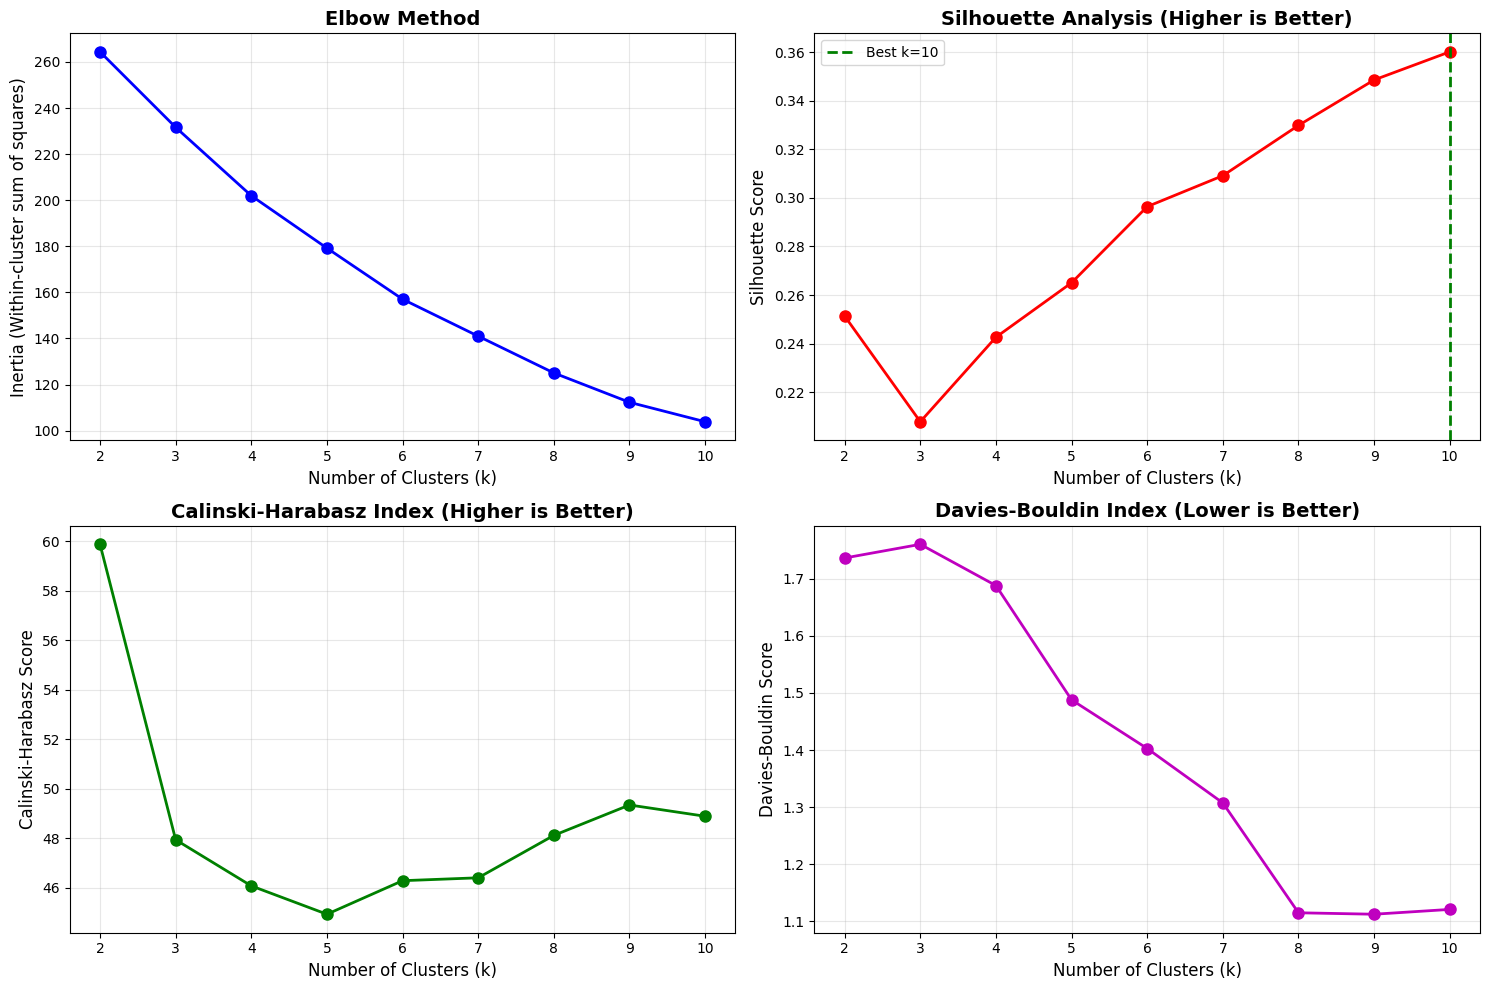

✓ Evaluation metrics visualized and saved


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Elbow Method (Inertia)
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(k_range)

# 2. Silhouette Score (Higher is better)
axes[0, 1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=best_k, color='green', linestyle='--', linewidth=2, 
                   label=f'Best k={best_k}')
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Analysis (Higher is Better)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(k_range)

# 3. Calinski-Harabasz Score (Higher is better)
axes[1, 0].plot(k_range, calinski_scores, 'go-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 0].set_title('Calinski-Harabasz Index (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(k_range)

# 4. Davies-Bouldin Score (Lower is better)
axes[1, 1].plot(k_range, davies_bouldin_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[1, 1].set_title('Davies-Bouldin Index (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(k_range)

plt.tight_layout()
plt.savefig('../results/cluster_evaluation_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Evaluation metrics visualized and saved")

In [5]:
# Fit final model
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20, max_iter=500)
final_labels = final_kmeans.fit_predict(features_df)

# Add cluster labels to datasets
features_df['cluster'] = final_labels
df_full['cluster'] = final_labels

print(f"✓ Clustering completed with k={best_k}")
print(f"\nCluster distribution:")
cluster_counts = pd.Series(final_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = count / len(final_labels) * 100
    print(f"  Cluster {cluster_id}: {count:5} titles ({percentage:5.2f}%)")

# Final metrics
final_silhouette = silhouette_score(features_df.drop('cluster', axis=1), final_labels)
final_calinski = calinski_harabasz_score(features_df.drop('cluster', axis=1), final_labels)
final_davies = davies_bouldin_score(features_df.drop('cluster', axis=1), final_labels)

print(f"\nFinal Clustering Quality Metrics:")
print(f"  Silhouette Score:      {final_silhouette:.4f}")
print(f"  Calinski-Harabasz:     {final_calinski:.2f}")
print(f"  Davies-Bouldin:        {final_davies:.4f}")


✓ Clustering completed with k=10

Cluster distribution:
  Cluster 0:    22 titles (11.00%)
  Cluster 1:    25 titles (12.50%)
  Cluster 2:    23 titles (11.50%)
  Cluster 3:    18 titles ( 9.00%)
  Cluster 4:    26 titles (13.00%)
  Cluster 5:    20 titles (10.00%)
  Cluster 6:    23 titles (11.50%)
  Cluster 7:    15 titles ( 7.50%)
  Cluster 8:    10 titles ( 5.00%)
  Cluster 9:    18 titles ( 9.00%)

Final Clustering Quality Metrics:
  Silhouette Score:      0.3601
  Calinski-Harabasz:     48.89
  Davies-Bouldin:        1.1209


In [6]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
features_2d = pca.fit_transform(features_df.drop('cluster', axis=1))

# Create DataFrame with PCA results
pca_df = pd.DataFrame({
    'PC1': features_2d[:, 0],
    'PC2': features_2d[:, 1],
    'cluster': final_labels
})

print(f"✓ PCA completed")
print(f"  Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"  Total explained variance: {pca.explained_variance_ratio_.sum():.2%}")

# Get feature importance (loadings)
feature_names = features_df.drop('cluster', axis=1).columns
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)
print(f"\nTop 5 features contributing to PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())

✓ PCA completed
  Explained variance ratio: [0.25413119 0.1677911 ]
  Total explained variance: 42.19%

Top 5 features contributing to PC1:
is_tv_show                      0.680251
genre_international_movies      0.364303
genre_international_tv_shows    0.316477
genre_action_and_adventure      0.236782
duration_norm                   0.230737
Name: PC1, dtype: float64


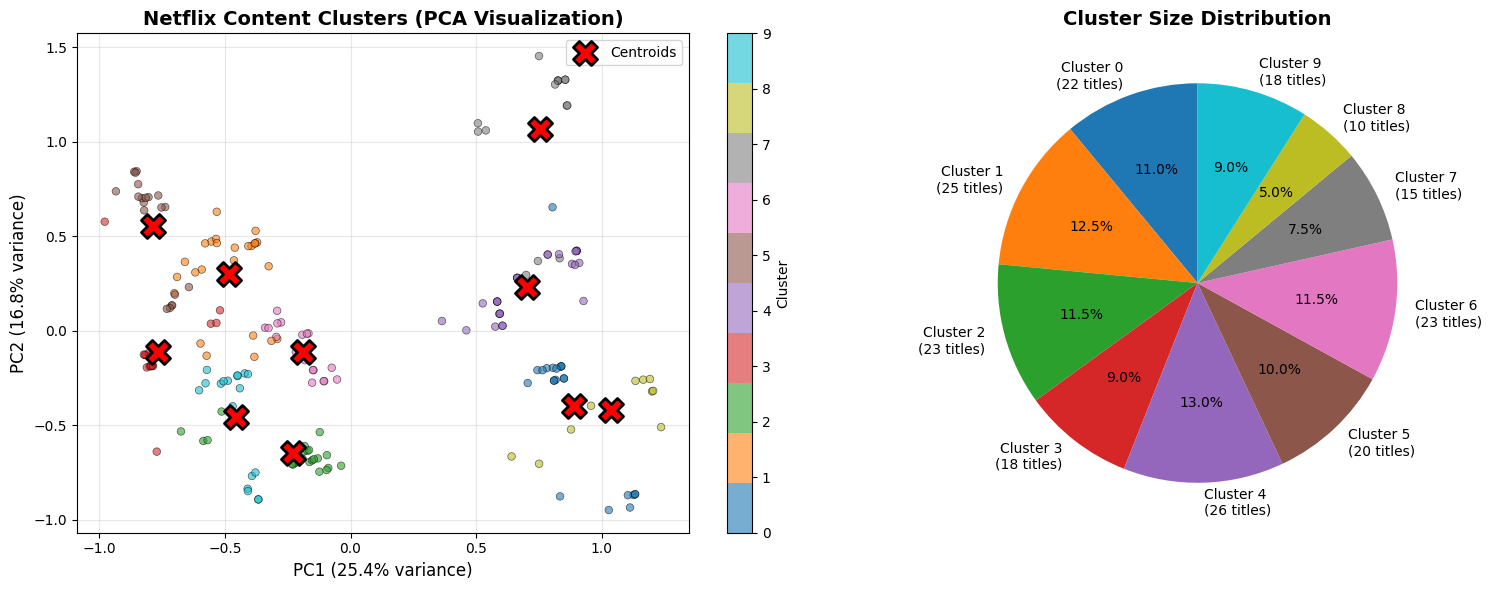

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with cluster colors
scatter = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], 
                          c=pca_df['cluster'], cmap='tab10', 
                          alpha=0.6, s=30, edgecolors='black', linewidth=0.5)

# Add cluster centers
centers_2d = pca.transform(final_kmeans.cluster_centers_)
axes[0].scatter(centers_2d[:, 0], centers_2d[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', 
                linewidth=2, label='Centroids', zorder=5)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
axes[0].set_title('Netflix Content Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Cluster')

# Pie chart of cluster sizes
cluster_sizes = pd.Series(final_labels).value_counts().sort_index()
colors = plt.cm.tab10(np.linspace(0, 1, best_k))
axes[1].pie(cluster_sizes.values, 
            labels=[f'Cluster {i}\n({cluster_sizes[i]} titles)' for i in cluster_sizes.index],
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Cluster Size Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/cluster_visualization_2d.png', dpi=300, bbox_inches='tight')
plt.show()


CLUSTER 0
Size: 22 titles (11.00%)

Content Type:
  TV Show: 22 (100.0%)

Release Year:
  Mean: 2018
  Median: 2020
  Range: 1994 - 2021

Top Ratings:
  TV-Y7: 12 (54.5%)
  TV-Y: 7 (31.8%)
  TV-G: 2 (9.1%)

Top Genres:
  Kids' TV: 22
  TV Comedies: 7
  Korean TV Shows: 3
  TV Sci-Fi & Fantasy: 2
  Anime Series: 1

Top Countries:
  Unknown Country: 8
  United States: 5
  United Kingdom: 2

Sample Titles:
  1. Tayo and Little Wizards
  2. Angry Birds
  3. Chhota Bheem
  4. He-Man and the Masters of the Universe
  5. Numberblocks

Average Feature Values:
  is_tv_show: 1.000
  release_year_norm: 0.949
  rating_level_norm: 0.159
  duration_norm: 0.170

CLUSTER 1
Size: 25 titles (12.50%)

Content Type:
  Movie: 25 (100.0%)

Release Year:
  Mean: 2005
  Median: 2009
  Range: 1975 - 2021

Top Ratings:
  PG-13: 10 (40.0%)
  R: 7 (28.0%)
  PG: 4 (16.0%)

Top Genres:
  Dramas: 25
  Action & Adventure: 7
  Comedies: 6
  Romantic Movies: 5
  Classic Movies: 3

Top Countries:
  United States: 20
  

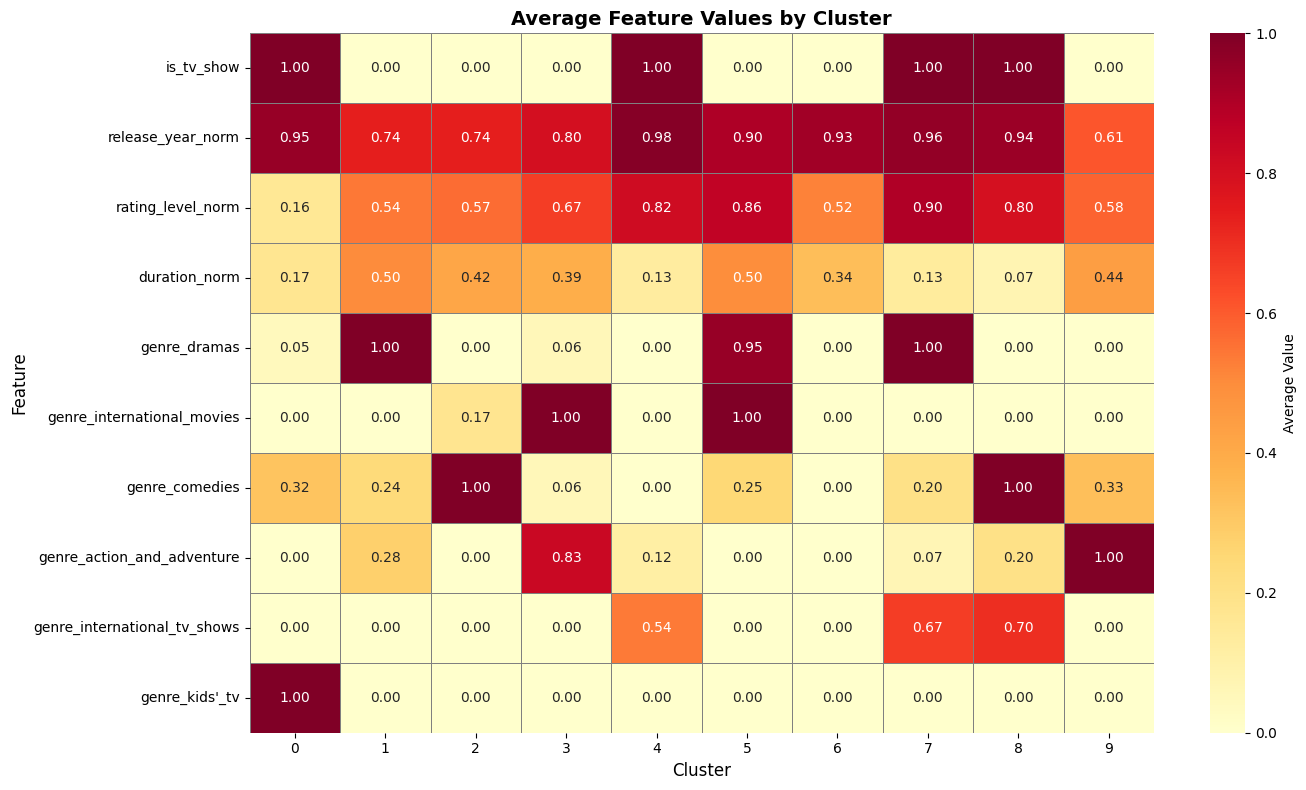

✓ Feature importance heatmap created


In [8]:
# Analyze each cluster
cluster_summaries = []

for cluster_id in range(best_k):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*60}")
    
    # Get cluster data
    cluster_mask = df_full['cluster'] == cluster_id
    cluster_data = df_full[cluster_mask]
    cluster_features = features_df[features_df['cluster'] == cluster_id].drop('cluster', axis=1)
    
    # Size and percentage
    size = len(cluster_data)
    percentage = size / len(df_full) * 100
    print(f"Size: {size} titles ({percentage:.2f}%)")
    
    # Content type distribution
    type_dist = cluster_data['type'].value_counts()
    print(f"\nContent Type:")
    for content_type, count in type_dist.items():
        type_pct = count / size * 100
        print(f"  {content_type}: {count} ({type_pct:.1f}%)")
    
    # Release year statistics
    print(f"\nRelease Year:")
    print(f"  Mean: {cluster_data['release_year'].mean():.0f}")
    print(f"  Median: {cluster_data['release_year'].median():.0f}")
    print(f"  Range: {cluster_data['release_year'].min():.0f} - {cluster_data['release_year'].max():.0f}")
    
    # Top ratings
    top_ratings = cluster_data['rating'].value_counts().head(3)
    print(f"\nTop Ratings:")
    for rating, count in top_ratings.items():
        rating_pct = count / size * 100
        print(f"  {rating}: {count} ({rating_pct:.1f}%)")
    
    # Top genres
    cluster_genres = cluster_data['listed_in'].dropna().str.split(',').explode().str.strip()
    top_genres = cluster_genres.value_counts().head(5)
    print(f"\nTop Genres:")
    for genre, count in top_genres.items():
        print(f"  {genre}: {count}")
    
    # Top countries
    cluster_countries = cluster_data['country'].dropna().str.split(',').explode().str.strip()
    top_countries = cluster_countries.value_counts().head(3)
    print(f"\nTop Countries:")
    for country, count in top_countries.items():
        print(f"  {country}: {count}")
    
    # Sample titles
    print(f"\nSample Titles:")
    sample_titles = cluster_data['title'].head(5).tolist()
    for i, title in enumerate(sample_titles, 1):
        print(f"  {i}. {title}")
    
    # Feature averages
    print(f"\nAverage Feature Values:")
    for feature in ['is_tv_show', 'release_year_norm', 'rating_level_norm', 'duration_norm']:
        avg_val = cluster_features[feature].mean()
        print(f"  {feature}: {avg_val:.3f}")
    
    # Store summary
    cluster_summaries.append({
        'cluster_id': cluster_id,
        'size': size,
        'percentage': percentage,
        'main_type': type_dist.index[0],
        'type_pct': type_dist.values[0] / size * 100,
        'avg_release_year': cluster_data['release_year'].mean(),
        'top_rating': top_ratings.index[0],
        'top_genre': top_genres.index[0],
        'top_country': top_countries.index[0]
    })

# Create summary DataFrame
summary_df = pd.DataFrame(cluster_summaries)
print("\n" + "=" * 60)
print("CLUSTER SUMMARY TABLE")
print("=" * 60)
print(summary_df.to_string(index=False))

# Feature Importance by Cluster
# Calculate mean feature values for each cluster
cluster_feature_means = features_df.groupby('cluster').mean()

# Visualize
fig, ax = plt.subplots(figsize=(14, 8))

# Select key features to display
key_features = ['is_tv_show', 'release_year_norm', 'rating_level_norm', 'duration_norm']
genre_features = [col for col in cluster_feature_means.columns if col.startswith('genre_')][:6]
key_features.extend(genre_features)

# Create heatmap
sns.heatmap(cluster_feature_means[key_features].T, annot=True, fmt='.2f', 
            cmap='YlOrRd', cbar_kws={'label': 'Average Value'},
            linewidths=0.5, linecolor='gray')
plt.title('Average Feature Values by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../results/cluster_feature_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature importance heatmap created")

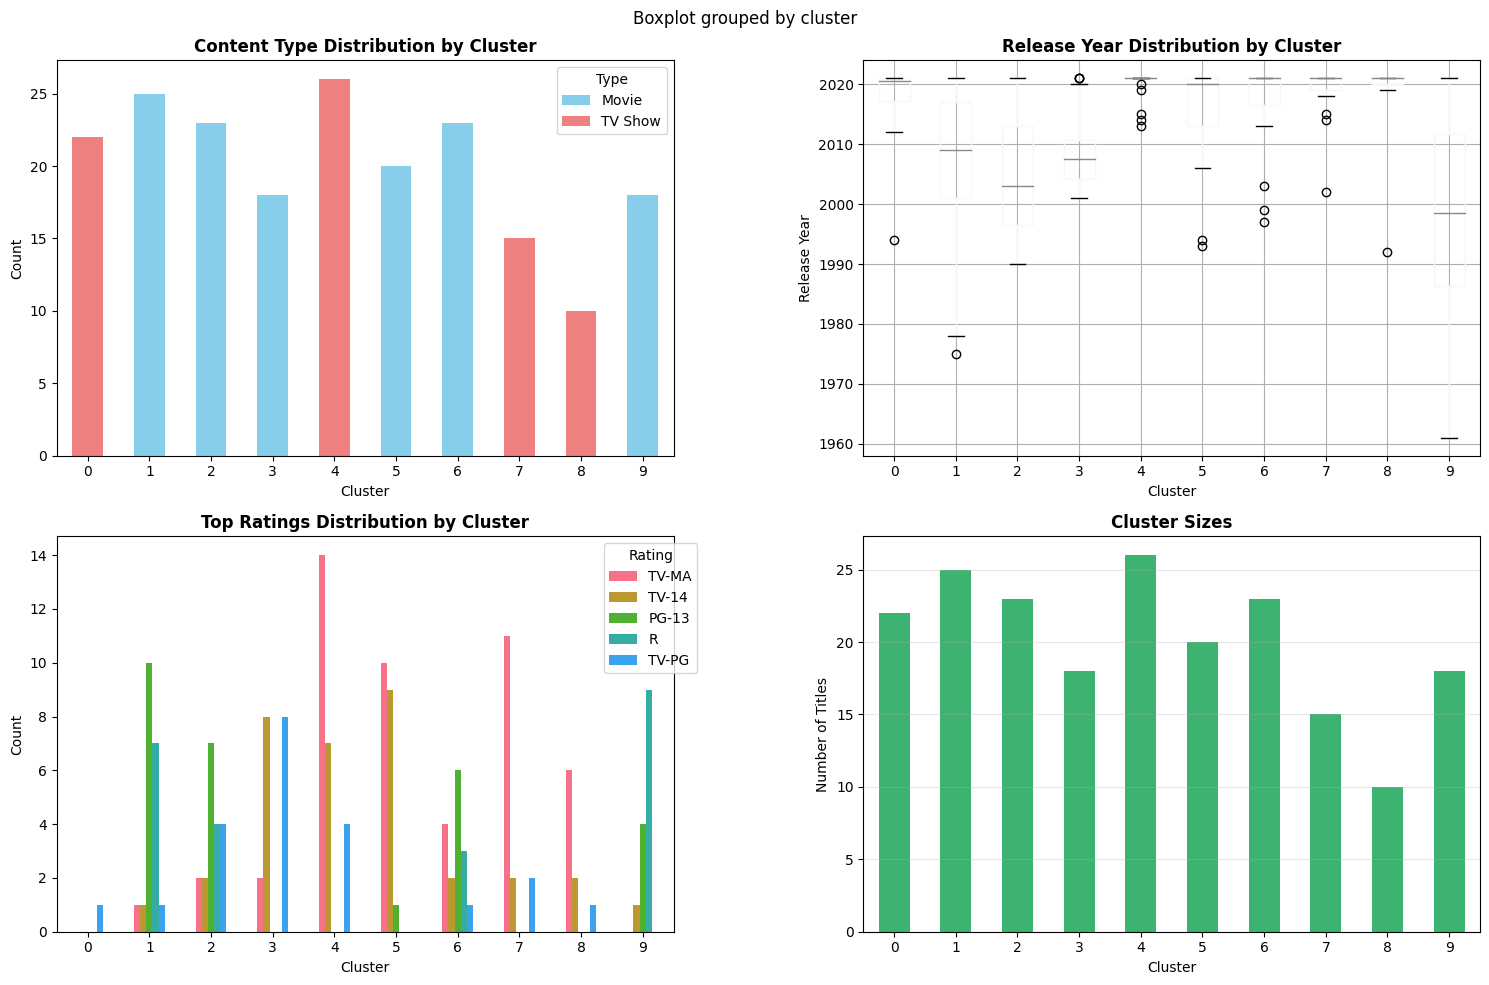

✓ Comparison visualizations created


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Content type by cluster
type_by_cluster = pd.crosstab(df_full['cluster'], df_full['type'])
type_by_cluster.plot(kind='bar', stacked=True, ax=axes[0, 0], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Content Type Distribution by Cluster', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Type')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Release year by cluster
df_full.boxplot(column='release_year', by='cluster', ax=axes[0, 1])
axes[0, 1].set_title('Release Year Distribution by Cluster', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Release Year')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# 3. Rating distribution by cluster (top ratings only)
top_ratings = df_full['rating'].value_counts().head(5).index
rating_by_cluster = pd.crosstab(df_full['cluster'], df_full['rating'])[top_ratings]
rating_by_cluster.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Top Ratings Distribution by Cluster', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Rating', bbox_to_anchor=(1.05, 1))
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Cluster sizes
cluster_sizes.plot(kind='bar', ax=axes[1, 1], color='mediumseagreen')
axes[1, 1].set_title('Cluster Sizes', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Titles')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/cluster_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comparison visualizations created")

In [10]:
# Save clustered dataset
output_path_clustered = '../results/netflix_clustered.csv'
df_full.to_csv(output_path_clustered, index=False)
print(f"✓ Saved clustered dataset: {output_path_clustered}")

# Save cluster summary
output_path_summary = '../results/cluster_summary.csv'
summary_df.to_csv(output_path_summary, index=False)
print(f"✓ Saved cluster summary: {output_path_summary}")

# Save cluster feature means
output_path_features = '../results/cluster_feature_means.csv'
cluster_feature_means.to_csv(output_path_features)
print(f"✓ Saved cluster feature means: {output_path_features}")

# Save PCA results
output_path_pca = '../results/pca_coordinates.csv'
pca_df.to_csv(output_path_pca, index=False)
print(f"✓ Saved PCA coordinates: {output_path_pca}")

✓ Saved clustered dataset: ../results/netflix_clustered.csv
✓ Saved cluster summary: ../results/cluster_summary.csv
✓ Saved cluster feature means: ../results/cluster_feature_means.csv
✓ Saved PCA coordinates: ../results/pca_coordinates.csv


In [11]:
insights = f"""
NETFLIX CONTENT CLUSTERING RESULTS
===================================

CLUSTERING SUMMARY:
- Optimal number of clusters: {best_k}
- Silhouette Score: {final_silhouette:.4f}
- Total titles analyzed: {len(df_full)}

CLUSTER CHARACTERISTICS:
"""

for _, row in summary_df.iterrows():
    insights += f"""
Cluster {int(row['cluster_id'])} ({row['percentage']:.1f}% of content):
  - Primary Content: {row['main_type']} ({row['type_pct']:.1f}%)
  - Average Release Year: {row['avg_release_year']:.0f}
  - Dominant Rating: {row['top_rating']}
  - Top Genre: {row['top_genre']}
  - Main Origin: {row['top_country']}
"""

In [12]:
with open('../results/clustering_insights.txt', 'w', encoding='utf-8') as f:
    f.write(insights)
print("\n✓ Insights saved to: ../results/clustering_insights.txt")


✓ Insights saved to: ../results/clustering_insights.txt
